# **Introduction - Data Cleaning**

Data cleaning adalah suatu prosedur untuk memastikan kebenaran, konsistensi, dan kegunaan suatu data yang ada dalam dataset. Caranya adalah dengan mendeteksi adanya error atau corrupt pada data, kemudian memperbaiki atau menghapus data jika memang diperlukan.

Proses data cleaning yang sering dilakukan adalah sebagai berikut

<li>Standarisasi Format Nilai</li>
<li>Handling Missing Value</li>
<li>Redudansi Data (Data Duplikat)</li>
<li>Handling Outlier</li>

Pada contoh dibawah ini akan dilakukan beberapa tahapan cleaning data dengan dataset yang telah disediakan

# **A. First Step : Data yang Digunakan**

Data yang digunakan adalah data telco customer yang termuat dalam google big query

In [6]:
from google.colab import auth, data_table
from google.cloud import bigquery
from pandas_gbq import to_gbq

# Proses autentikasi akun
auth.authenticate_user()
print('Authenticated')

Authenticated


In [7]:
# Buat BigQuery client
project_id = 'dqlab21-481601'
client = bigquery.Client(project = project_id)

In [8]:
import pandas as pd
pd.set_option('display.max_columns', None)

# Inisialisasi query yang akan dijalankan
query = """
  SELECT
    st.customer_id,
    st.open_date,
    dg.gender,
    dg.age,
    dg.married,
    dg.number_of_dependents,
    st.satisfaction_score,
    st.customer_status,
    st.cltv,
    sv.number_of_referrals,
    sv.tenure_in_months,
    sv.offer,
    sv.phone_service,
    sv.multiple_lines,
    sv.internet_service,
    sv.internet_type,
    sv.online_security,
    sv.online_backup,
    sv.device_protection_plan,
    sv.premium_tech_support,
    sv.streaming_tv,
    sv.streaming_movies,
    sv.contract,
    sv.payment_method,
    sv.monthly_charge,
    sv.total_revenue,
    st.churn_category,
    st.churn_date,
    st.churn_reason
  FROM `dqlab-468906.pilotclass.telco_customer_demographics` AS dg
  LEFT JOIN `dqlab-468906.pilotclass.telco_customer_status` AS st
    ON st.customer_id = dg.customer_id
  LEFT JOIN `dqlab-468906.pilotclass.telco_customer_services` AS sv
    ON sv.customer_id = dg.customer_id
"""

# Proses ekstraksi data dari BigQuery ke pandas
data_telco_customer = client.query(query).to_dataframe()

# Tampilkan hasil
data_telco_customer.head(5)

,customer_id,open_date,gender,age,married,number_of_dependents,satisfaction_score,customer_status,cltv,number_of_referrals,tenure_in_months,offer,phone_service,multiple_lines,internet_service,internet_type,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,contract,payment_method,monthly_charge,total_revenue,churn_category,churn_date,churn_reason
0,None,None,None,<NA>,Yes,0,<NA>,None,<NA>,<NA>,<NA>,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,7841-TZDMQ,2025-06-24,Male,19,No,0,3,Churned,2667,0,2,None,Yes,No,Yes,DSL,No,No,No,No,No,No,Month-to-Month,Credit Card,$ 46,"$ 184,12",Other,2025-08-29,Don't know
2,0822-GAVAP,2025-06-17,Female,19,No,0,1,Churned,3146,0,2,Offer E,No,No,Yes,DSL,No,No,No,No,No,Yes,Month-to-Month,Bank Withdrawal,"$ 34,7","$ 62,25",Competitor,2025-08-17,Competitor made better offer
3,5673-FSSMF,2025-07-14,Female,19,No,0,3,Churned,4611,0,1,Offer E,Yes,Yes,Yes,Cable,No,No,No,No,No,Yes,Month-to-Month,Bank Withdrawal,"$ 60,15","$ 113,63",Attitude,2025-08-17,Attitude of support person
4,4704-ERYFC,2023-10-11,Female,19,Yes,0,1,Churned,2159,1,22,None,Yes,No,Yes,Fiber Optic,No,No,No,No,No,No,Month-to-Month,Bank Withdrawal,"$ 69,25","$ 2260,42",Competitor,2025-08-14,Competitor offered higher download speeds


Berikut deskripsi singkat untuk tiap kolom:

* `customer_id` : ID unik untuk mengidentifikasi setiap pelanggan  
* `open_date` : Tanggal pelanggan pertama kali bergabung atau membuka akun layanan  
* `gender` : Jenis kelamin pelanggan (Male/Female)  
* `age` : Usia pelanggan dalam tahun  
* `married` : Status pernikahan pelanggan (Yes/No)  
* `number_of_dependents` : Jumlah tanggungan yang dimiliki pelanggan  
* `satisfaction_score` : Skor kepuasan pelanggan terhadap layanan (skala 1–5)  
* `customer_status` : Status pelanggan saat ini (Active, Churned, Joined)  
* `cltv` : Customer Lifetime Value, nilai total yang dihasilkan pelanggan sepanjang masa berlangganan  
* `number_of_referrals` : Jumlah referral/rekomendasi yang dilakukan pelanggan  
* `tenure_in_months` : Lama pelanggan berlangganan dalam bulan  
* `offer` : Penawaran khusus atau paket promosi yang diterima pelanggan (misalnya Offer A, Offer B, None)  
* `phone_service` : Status penggunaan layanan telepon (Yes/No)  
* `internet_service` : Status penggunaan layanan internet (Yes/No)  
* `internet_type` : Jenis layanan internet yang digunakan (DSL, Fiber Optic, Cable)  
* `contract` : Jenis kontrak pelanggan (Month-to-Month, One Year, Two Year)  
* `payment_method` : Metode pembayaran yang digunakan pelanggan (Credit Card, Bank Transfer, Electronic Check, dll.)  
* `monthly_charge` : Biaya langganan bulanan pelanggan  
* `total_revenue` : Total pendapatan yang dihasilkan dari pelanggan sejak bergabung  
* `churn_category` : Kategori alasan churn pelanggan
* `churn_date` : Tanggal kapan customer berhenti berlangganan
* `churn_reason` : Alasan spesifik pelanggan berhenti berlangganan  


In [10]:
# Memperoleh informasi umum pada data
data_telco_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   customer_id             7044 non-null   object
 1   open_date               7044 non-null   object
 2   gender                  7045 non-null   object
 3   age                     7045 non-null   Int64 
 4   married                 7046 non-null   object
 5   number_of_dependents    7046 non-null   Int64 
 6   satisfaction_score      7044 non-null   Int64 
 7   customer_status         7044 non-null   object
 8   cltv                    7044 non-null   Int64 
 9   number_of_referrals     7044 non-null   Int64 
 10  tenure_in_months        7044 non-null   Int64 
 11  offer                   3166 non-null   object
 12  phone_service           7044 non-null   object
 13  multiple_lines          7044 non-null   object
 14  internet_service        7044 non-null   object
 15  inte

**_Informasi apa saja yang bisa diperoleh?_**

...

#  **B. Standarisasi Data**

Standarisasi data perlu dilakukan, karena :

* Standarisasi membantu memastikan bahwa semua fitur atau variabel dalam dataset memiliki konsistensi
* Mempermudah dalam melakukan proses analisa
* Menyeragamkan data, skema dan metadata lain yang disimpan ke basis data

Standarisasi data yang biasanya dilakukan adalah :      
* Menyeragamkan format tanggal (YYYY-MM-DD)
* Menyeragamkan format *free text*
* Mentransformasi tipe data yang sesuai


### 👨‍💻 Task B1

Pada dataframe `data_telco_customer`, Ubah format date DD/MM/YYYY pada kolom `open_date` menjadi format YYYY-MM-DD

Note : Untuk mengubah string menjadi format datetime gunakan sintaks berikut

```
pd.to_datetime(Series, format)
```

<p align="right"><sup>docs : <i><a href="https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html">https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html</i></sup></a></p>

(opsional) Lalu lanjutkan dengan sintaks berikut untuk merubah format menjadi format yang diinginkan

```
Series.dt.strftime(format_yang_diinginkan)
```
<p align="right"><sup>docs : <i><a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.strftime.html">https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.strftime.html</i></sup></a></p>


https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior




In [ ]:
# Convert to datetime object


# Tampilkan hasilnya


,customer_id,open_date,gender,age,married,number_of_dependents,satisfaction_score,customer_status,cltv,number_of_referrals,tenure_in_months,offer,phone_service,multiple_lines,internet_service,internet_type,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,contract,payment_method,monthly_charge,total_revenue,churn_category,churn_date,churn_reason
0,None,NaT,None,<NA>,True,0,<NA>,None,<NA>,<NA>,<NA>,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,<NA>,None
1,7841-TZDMQ,2025-06-24,Male,19,False,0,3,Churned,2667,0,2,None,Yes,No,Yes,DSL,No,No,No,No,No,No,Month-to-Month,Credit Card,$ 46,"$ 184,12",Other,29082025,Don't know
2,0822-GAVAP,2025-06-17,Female,19,False,0,1,Churned,3146,0,2,Offer E,No,No,Yes,DSL,No,No,No,No,No,Yes,Month-to-Month,Bank Withdrawal,"$ 34,7","$ 62,25",Competitor,17082025,Competitor made better offer
3,5673-FSSMF,2025-07-14,Female,19,False,0,3,Churned,4611,0,1,Offer E,Yes,Yes,Yes,Cable,No,No,No,No,No,Yes,Month-to-Month,Bank Withdrawal,"$ 60,15","$ 113,63",Attitude,17082025,Attitude of support person
4,4704-ERYFC,2023-10-11,Female,19,True,0,1,Churned,2159,1,22,None,Yes,No,Yes,Fiber Optic,No,No,No,No,No,No,Month-to-Month,Bank Withdrawal,"$ 69,25","$ 2260,42",Competitor,14082025,Competitor offered higher download speeds


Lakukan hal yang sama untuk dataframe `data_telco_customer`, Ubah format date DDMMYYYY pada kolom `churn_date` menjadi format YYYY-MM-DD



In [ ]:
# Buat kondisi


# Ubah menjadi format date


# Tampilkan hasilnya


,customer_id,open_date,gender,age,married,number_of_dependents,satisfaction_score,customer_status,cltv,number_of_referrals,tenure_in_months,offer,phone_service,multiple_lines,internet_service,internet_type,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,contract,payment_method,monthly_charge,total_revenue,churn_category,churn_date,churn_reason
0,None,NaT,None,<NA>,True,0,<NA>,None,<NA>,<NA>,<NA>,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaT,None
1,7841-TZDMQ,2025-06-24,Male,19,False,0,3,Churned,2667,0,2,None,Yes,No,Yes,DSL,No,No,No,No,No,No,Month-to-Month,Credit Card,$ 46,"$ 184,12",Other,2025-08-29,Don't know
2,0822-GAVAP,2025-06-17,Female,19,False,0,1,Churned,3146,0,2,Offer E,No,No,Yes,DSL,No,No,No,No,No,Yes,Month-to-Month,Bank Withdrawal,"$ 34,7","$ 62,25",Competitor,2025-08-17,Competitor made better offer
3,5673-FSSMF,2025-07-14,Female,19,False,0,3,Churned,4611,0,1,Offer E,Yes,Yes,Yes,Cable,No,No,No,No,No,Yes,Month-to-Month,Bank Withdrawal,"$ 60,15","$ 113,63",Attitude,2025-08-17,Attitude of support person
4,4704-ERYFC,2023-10-11,Female,19,True,0,1,Churned,2159,1,22,None,Yes,No,Yes,Fiber Optic,No,No,No,No,No,No,Month-to-Month,Bank Withdrawal,"$ 69,25","$ 2260,42",Competitor,2025-08-14,Competitor offered higher download speeds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041,4323-SADQS,2025-01-18,Male,61,True,6,1,Churned,3520,2,7,None,No,No,Yes,Cable,Yes,No,No,Yes,No,No,Month-to-Month,Bank Withdrawal,"$ 34,5","$ 279,25",Dissatisfaction,2025-08-23,Service dissatisfaction
7042,5510-BOIUJ,2025-07-21,Male,35,False,7,3,Churned,5437,0,1,None,Yes,No,No,None,No,No,No,No,No,No,Month-to-Month,Credit Card,"$ 19,25","$ 32,06",Attitude,2025-08-26,Attitude of service provider
7043,6286-ZHAOK,2023-12-12,Female,47,True,7,4,Stayed,3235,6,20,Offer D,Yes,Yes,No,None,No,No,No,No,No,No,Month-to-Month,Bank Withdrawal,"$ 25,55","$ 1244,4",None,NaT,None
7044,6950-TWMYB,2021-02-03,Male,31,True,8,3,Stayed,4387,2,54,Offer B,Yes,No,Yes,Fiber Optic,No,Yes,No,Yes,No,No,Two Year,Bank Withdrawal,"$ 79,95","$ 6883,85",None,NaT,None


In [13]:
data_telco_customer['open_date'].dt.year

,open_date
0,NaN
1,2025.0
2,2025.0
3,2025.0
4,2025.0
...,...
7041,2025.0
7042,2025.0
7043,NaN
7044,NaN


In [17]:
for col  in data_telco_customer.columns:
  if ('date' in col):
    print(col)

open_date
churn_date


In [ ]:
for dt_col in ['open_date', 'churn_date']:
  data_telco_customer[dt_col] pd.to_datetime(data_telco_customer[dt_col])

In [12]:
data_telco_customer['open_date'] = pd.to_datetime(data_telco_customer['open_date'])
data_telco_customer['open_date'] = pd.to_datetime(data_telco_customer['churn_date'])

data_telco_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   customer_id             7044 non-null   object        
 1   open_date               1868 non-null   datetime64[ns]
 2   gender                  7045 non-null   object        
 3   age                     7045 non-null   Int64         
 4   married                 7046 non-null   object        
 5   number_of_dependents    7046 non-null   Int64         
 6   satisfaction_score      7044 non-null   Int64         
 7   customer_status         7044 non-null   object        
 8   cltv                    7044 non-null   Int64         
 9   number_of_referrals     7044 non-null   Int64         
 10  tenure_in_months        7044 non-null   Int64         
 11  offer                   3166 non-null   object        
 12  phone_service           7044 non-null   object  

### 👨‍💻 Task B2

Pada dataframe `data_telco_customer`, hapus simbol currency ($ ) pada kolom `monthly_charge` dan `total_revenue` kemudian konversi tipe datanya menjadi float

Untuk mengubah suatu string menjadi string yang lain gunakan sintaks

```
Series.str.replace(pat, repl, regex = False)
```

<p align="right"><sup>docs : <i><a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html">https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html</i></sup></a></p>

Sedangkan untuk mengubah / mentransformasi tipedata gunakan

```
Series.astype(dtipe)
```

<p align="right"><sup>docs : <i><a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.astype.html">https://pandas.pydata.org/docs/reference/api/pandas.Series.astype.html</i></sup></a></p>

In [16]:
# Inisialisasi kolom yang akan di konversi
col_float = ['monthly_charge', 'total_revenue']

# Lakukan proses looping
for col in col_float:
    # Hapus simbol $
      data_telco_customer[col] = data_telco_customer[col].str.replace('$', '')
    # Ubah simbol , menjadi .
      data_telco_customer[col] = data_telco_customer[col].str.replace(',', '.')
    # Konversi tipedata str -> float
      data_telco_customer[col] = data_telco_customer[col].astype(pd.Float32Dtype())

# Tampilkan hasilnya
display(data_telco_customer)

,customer_id,open_date,gender,age,married,number_of_dependents,satisfaction_score,customer_status,cltv,number_of_referrals,tenure_in_months,offer,phone_service,multiple_lines,internet_service,internet_type,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,contract,payment_method,monthly_charge,total_revenue,churn_category,churn_date,churn_reason
0,None,NaT,None,<NA>,Yes,0,<NA>,None,<NA>,<NA>,<NA>,None,None,None,None,None,None,None,None,None,None,None,None,None,<NA>,<NA>,None,None,None
1,7841-TZDMQ,2025-08-29,Male,19,No,0,3,Churned,2667,0,2,None,Yes,No,Yes,DSL,No,No,No,No,No,No,Month-to-Month,Credit Card,46.0,184.119995,Other,2025-08-29,Don't know
2,0822-GAVAP,2025-08-17,Female,19,No,0,1,Churned,3146,0,2,Offer E,No,No,Yes,DSL,No,No,No,No,No,Yes,Month-to-Month,Bank Withdrawal,34.700001,62.25,Competitor,2025-08-17,Competitor made better offer
3,5673-FSSMF,2025-08-17,Female,19,No,0,3,Churned,4611,0,1,Offer E,Yes,Yes,Yes,Cable,No,No,No,No,No,Yes,Month-to-Month,Bank Withdrawal,60.150002,113.629997,Attitude,2025-08-17,Attitude of support person
4,4704-ERYFC,2025-08-14,Female,19,Yes,0,1,Churned,2159,1,22,None,Yes,No,Yes,Fiber Optic,No,No,No,No,No,No,Month-to-Month,Bank Withdrawal,69.25,2260.419922,Competitor,2025-08-14,Competitor offered higher download speeds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041,4323-SADQS,2025-08-23,Male,61,Yes,6,1,Churned,3520,2,7,None,No,No,Yes,Cable,Yes,No,No,Yes,No,No,Month-to-Month,Bank Withdrawal,34.5,279.25,Dissatisfaction,2025-08-23,Service dissatisfaction
7042,5510-BOIUJ,2025-08-26,Male,35,No,7,3,Churned,5437,0,1,None,Yes,No,No,None,No,No,No,No,No,No,Month-to-Month,Credit Card,19.25,32.060001,Attitude,2025-08-26,Attitude of service provider
7043,6286-ZHAOK,NaT,Female,47,Yes,7,4,Stayed,3235,6,20,Offer D,Yes,Yes,No,None,No,No,No,No,No,No,Month-to-Month,Bank Withdrawal,25.549999,1244.400024,None,None,None
7044,6950-TWMYB,NaT,Male,31,Yes,8,3,Stayed,4387,2,54,Offer B,Yes,No,Yes,Fiber Optic,No,Yes,No,Yes,No,No,Two Year,Bank Withdrawal,79.949997,6883.850098,None,None,None


In [19]:
data_telco_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   customer_id             7044 non-null   object        
 1   open_date               1868 non-null   datetime64[ns]
 2   gender                  7045 non-null   object        
 3   age                     7045 non-null   Int64         
 4   married                 7046 non-null   object        
 5   number_of_dependents    7046 non-null   Int64         
 6   satisfaction_score      7044 non-null   Int64         
 7   customer_status         7044 non-null   object        
 8   cltv                    7044 non-null   Int64         
 9   number_of_referrals     7044 non-null   Int64         
 10  tenure_in_months        7044 non-null   Int64         
 11  offer                   3166 non-null   object        
 12  phone_service           7044 non-null   object  

### 👨‍💻 Task B3

Pada dataframe `data_telco_customer` periksa kolom gender, apakah ada sesuatu yang aneh? Jika iya apa itu

In [20]:
# Periksa kolom gender
data_telco_customer['gender'].unique

<bound method Series.unique of 0         None
1         Male
2       Female
3       Female
4       Female
         ...  
7041      Male
7042      Male
7043    Female
7044      Male
7045      Male
Name: gender, Length: 7046, dtype: object>

In [21]:
data_telco_customer['gender'].value_counts(dropna = False)

,count
gender,
Male,3547
Female,3483
Men,8
Woman,7
None,1


In [23]:
data_telco_customer.groupby(['gender', 'customer_status'])['customer_status'].count()

gender  customer_status
Female  Churned             938
        Joined              211
        Stayed             2333
Male    Churned             930
        Joined              243
        Stayed             2374
Men     Stayed                8
Woman   Stayed                7
Name: customer_status, dtype: int64

Apa yang seharusnya dilakukan? Mengapa demikian?

In [27]:
# Answer here
data_telco_customer['gender'] = data_telco_customer['gender'].mask(data_telco_customer['gender'] == 'Woman', 'Female')
data_telco_customer['gender'] = data_telco_customer['gender'].mask(data_telco_customer['gender'] == 'Men', 'Male')

In [28]:
# Periksa kembali

data_telco_customer['gender'].value_counts(dropna = False)

,count
gender,
Male,3555
Female,3490
None,1


---

In [33]:
# pemeriksaan agar tidak terlalu lama
obj_columns = data_telco_customer.select_dtypes(include = 'object').columns

for o in obj_columns:
  print(o)
  display(data_telco_customer[o].value_counts(dropna = False))
  print('\n')

customer_id


,count
customer_id,
2405-LBMUW,3
None,2
8414-MYSHR,2
0709-TVGUR,1
0354-WYROK,1
...,...
5364-XYIRR,1
9651-GTSAQ,1
2667-WYLWJ,1




gender


,count
gender,
Male,3555
Female,3490
None,1




married


,count
married,
No,3642
Yes,3404




customer_status


,count
customer_status,
Stayed,4722
Churned,1868
Joined,454
None,2




offer


,count
offer,
None,3880
Offer B,825
Offer E,805
Offer D,601
Offer A,520
Offer C,415




phone_service


,count
phone_service,
Yes,6360
No,684
None,2




multiple_lines


,count
multiple_lines,
No,4075
Yes,2969
None,2




internet_service


,count
internet_service,
Yes,5518
No,1526
None,2




internet_type


,count
internet_type,
Fiber Optic,3034
DSL,1654
None,1528
Cable,830




online_security


,count
online_security,
No,5025
Yes,2019
None,2




online_backup


,count
online_backup,
No,4613
Yes,2431
None,2




device_protection_plan


,count
device_protection_plan,
No,4623
Yes,2421
None,2




premium_tech_support


,count
premium_tech_support,
No,4998
Yes,2046
None,2




streaming_tv


,count
streaming_tv,
No,4338
Yes,2706
None,2




streaming_movies


,count
streaming_movies,
No,4311
Yes,2733
None,2




contract


,count
contract,
Month-to-Month,3610
Two Year,1883
One Year,1551
None,2




payment_method


,count
payment_method,
Bank Withdrawal,3910
Credit Card,2749
Mailed Check,385
None,2




churn_category


,count
churn_category,
None,5178
Competitor,840
Attitude,313
Dissatisfaction,304
Price,211
Other,200




churn_date


,count
churn_date,
None,5178
2025-08-24,97
2025-08-11,91
2025-08-26,86
2025-08-19,81
2025-08-23,80
2025-08-16,77
2025-08-20,75
2025-08-17,74




churn_reason


,count
churn_reason,
None,5178
Competitor had better devices,313
Competitor made better offer,311
Attitude of support person,219
Don't know,130
Competitor offered more data,117
Competitor offered higher download speeds,99
Attitude of service provider,94
Price too high,78


# **C. *Missing Data***

*Missing data*, juga dikenal sebagai data yang hilang, merujuk pada keadaan di mana tidak ada nilai yang tersedia atau tercatat untuk satu atau lebih variabel dalam kumpulan data. Dalam konteks analisis data, *missing data* terjadi ketika ada kekosongan atau ketidakhadiran informasi dalam dataset yang sedang dianalisis.

Data yang hilang dapat berupa nilai yang sebenarnya tidak diketahui atau tidak ada (misalnya, orang yang tidak merespons pertanyaan dalam survei), atau bisa juga berupa nilai yang hilang secara tidak sengaja (misalnya, kesalahan entri data)

*Missing data* dapat memiliki dampak yang signifikan pada analisis data dan interpretasi hasilnya. Ketika data yang hilang tidak diperlakukan dengan benar, dapat menyebabkan bias, pengurangan ukuran sampel, pengurangan efisiensi statistik, kesulitan dalam analisis, atau kesalahan interpretasi. Perhatikan contoh berikut :<br>

**[Contoh Kasus]** Sebuah toko ingin memeriksa seberapa besar *Salary* pelanggan mempengaruhi tingkat kumulatif *Spending Money* perminggu di tokonya. Diberikan data sebagai berikut
<center>
<table>
  <tr>
    <td align="center">Loyalty</td>
    <td align="center">Salary</td>
    <td align="center">Spend</td>
  </tr>
  <tr>
    <td align="center">Silver</td>
    <td align="center">4.500.000</td>
    <td align="center">250.000</td>
  </tr>
  <tr>
    <td align="center">Silver</td>
    <td align="center">4.750.000</td>
    <td align="center">NULL</td>
  </tr>
  <tr>
    <td align="center">Silver</td>
    <td align="center">5.200.000</td>
    <td align="center">NULL</td>
  </tr>
  <tr>
    <td align="center">Gold</td>
    <td align="center">NULL</td>
    <td align="center">110.000</td>
  </tr>
  <tr>
    <td align="center">Gold</td>
    <td align="center">NULL</td>
    <td align="center">89.000</td>
  </tr>
  <tr>
    <td align="center">Gold</td>
    <td align="center">10.000.000</td>
    <td align="center">NULL</td>
  </tr>
  <tr>
    <td align="center">Gold</td>
    <td align="center">10.750.000</td>
    <td align="center">0</td>
  </tr>
  <tr>
    <td align="center">Gold</td>
    <td align="center">11.500.000</td>
    <td align="center">800.000</td>
  </tr>
</table>
</center>

<br>

**[Jawab]** : Untuk menjawab persoalan tersebut dapat menggunakan analisa regresi sederhana

Bentuk umum Regresi Linear Sederhana adalah sebagai berikut

\begin{equation}
y = m\cdot x + b
\end{equation}

dengan :   
<ul>  
<li>𝑦 = variabel dependen</li>
<li>𝑥 = variabel independen</li>
<li>𝑚 = slope / kemiringan (angka ini menyatakan perubahan nilai Y saat kenaikan satu satuan nilai X)</li>
<li>𝑏 = intersep, angka ini menyatakan nilai 𝑦 saat nilai 𝑥 = 0</li>
</ul>

𝑚 dan 𝑏 dirumuskan sebagai berikut :

<img src="https://i.stack.imgur.com/JxedC.jpg">

Menurut kalian, apakah perhitungan diatas mungkin dilakukan jika masih mengandung data yang hilang?
<br><br>
<p align="right"><sup>docs : <i><a href="https://pandas.pydata.org/docs/user_guide/missing_data.html">https://pandas.pydata.org/docs/user_guide/missing_data.html</i></sup></a></p>

<h3><b>👌 Simbol <i>Missing Data</i></b></h3>

Jika anda menemukan simbol seperti<br><br>
<center>
<table>
  <tr>
    <td align="center"><b>Simbol</b></td>
    <td align="center"><b>Sistem</b></td>
  </tr>
  <tr>
    <td align="center"><b>NULL</b></td>
    <td align="left">Database (SQL / NoSQL) dan beberapa bahasa pemrograman (C++, R)</td>
  </tr>
  <tr>
    <td align="center"><b>None</b></td>
    <td align="left">Python (Native)</td>
  </tr>
  <tr>
    <td align="center"><b>NA</b> atau <b>NaN</b> atau <b>NaT</b></td>
    <td align="left">Python dengan library tertentu (pandas / numpy)</td>
  </tr>
  <tr>
    <td align="center"><b>N/A</b></td>
    <td align="left">Excel</td>
  </tr>
  <tr>
    <td align="center">String Kosong, Simbol '-' atau teks lain</td>
    <td align="left">File format lain</td>
  </tr>
  <tr>
    <td align="center"><b>nil</b></td>
    <td align="left">Bahasa pemrograman Swift / Objective-C</td>
  </tr>
</table>
</center>
<br>

Maka ada data yang hilang (<i>Missing Data</i>) atau tidak terisi.


<h3><b>🗄️ Jenis <i>Missing Data</i></b></h3>

1. <b>Missing Completely at Random (MCAR)</b><br>
Misalkan pengumpulan data tentang tinggi badan dari sekelompok responden. Namun, dalam proses pengumpulan data, beberapa responden tidak mengisi pertanyaan tentang tinggi badan mereka. Setelah dianalisis, tidak ada pola yang menghubungkan data yang hilang dengan nilai variabel lainnya. Dalam hal ini, data yang hilang dapat dianggap sebagai hilang secara acak tanpa adanya keterkaitan dengan variabel yang diamati (MCAR).

2. <b>Missing at Random (MAR)</b><br>
Misalkan data pendapatan dan jenis kelamin. Jika responden pria lebih cenderung tidak memberikan informasi tentang pendapatan mereka daripada responden wanita, tetapi setelah diketahui jenis kelaminnya, ketidaklengkapan data tidak lagi berkaitan dengan pendapatan, maka hilangnya data dapat dikategorikan sebagai MAR

3. <b>Missing Not at Random (MNAR)</b><br>
Misalkan dilakukan survei tentang kebiasaan merokok di antara responden. Beberapa responden yang merokok berat mungkin enggan mengungkapkan informasi tersebut dalam survei karena merasa malu atau karena alasan lain. Dalam hal ini, data tentang kebiasaan merokok responden yang merokok berat akan cenderung hilang (MNAR) karena adanya pola tersembunyi terkait dengan variabel yang hilang (kebiasaan merokok responden).
<br>
<img src="https://raw.githubusercontent.com/bachtiyarmawork/DQLab-Project/main/Pilot%20Class%20-%20Jenis%20Missing%20Data.png" width="600" height="245">


<h3><b>🔍 Deteksi <i>Missing Data</i></b></h3>

Untuk mengetahui apakah sebuah data termasuk data yang hilang dapat menggunakan sintaks <br><br>

<center><code>DataFrame.isnull()</code> atau <code>DataFrame.isna()</code></center>

<br>Data yang ada akan diberi tanda **False** dan data yang hilang akan diberi tanda **True**<br>


docs : <i>https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html</i>

### 👨‍💻 Task C1

Pada dataframe `data_telco_customer`, lakukan pemeriksaan kolom mana saja yang mempunyai *missing value* dan berapa jumlahnya?

Note :      
Untuk memeriksa apakah suatu nilai termasuk missing data gunakan sintaks

```
DataFrame.isnull()
```

Untuk memeriksa banyak nilai null pada setiap kolom tambahkan sintaks

```
DataFrame.isnull().sum()
```

<p align="right"><sup>docs : <i><a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html">https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html</i></sup></a></p>

In [34]:
# Pemeriksaan nilai null pada data
data_telco_customer.isna()

,customer_id,open_date,gender,age,married,number_of_dependents,satisfaction_score,customer_status,cltv,number_of_referrals,tenure_in_months,offer,phone_service,multiple_lines,internet_service,internet_type,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,contract,payment_method,monthly_charge,total_revenue,churn_category,churn_date,churn_reason
0,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7042,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
7043,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,True
7044,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True


In [36]:
# Perhitungan banyak nilai null pada data
data_telco_customer.isna().sum()

,0
customer_id,2
open_date,5178
gender,1
age,1
married,0
number_of_dependents,0
satisfaction_score,2
customer_status,2
cltv,2
number_of_referrals,2


In [37]:
# Untuk mendeteksi spasi yang tidak dibutuhkan / tidak kelihatan
x = pd.DataFrame({
    'kolom1' : ['         ', '1', '2', None]
})

print(x)

      kolom1
0           
1          1
2          2
3       None


In [38]:
print(x['kolom1'].str.strip())

'', pd.NA

0        
1       1
2       2
3    None
Name: kolom1, dtype: object


('', <NA>)

### 👨‍💻 Task C2

Pada dataframe `data_telco_customer`, tampilkan semua data dimana kolom customer_id nya kosong / berupa missing value

Note :      
Untuk memeriksa nilai null pada sebuah kolom gunakan sintaks

```
Series.isnull()
```

<p align="right"><sup>docs : <i><a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.isna.html">https://pandas.pydata.org/docs/reference/api/pandas.Series.isna.html</i></sup></a></p>

In [44]:
# Buat kondisi dimana sale_id kosong
condition = data_telco_customer['customer_id'].isnull()

# Tampilkan hasilnya
display(data_telco_customer[condition])

,customer_id,open_date,gender,age,married,number_of_dependents,satisfaction_score,customer_status,cltv,number_of_referrals,tenure_in_months,offer,phone_service,multiple_lines,internet_service,internet_type,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,contract,payment_method,monthly_charge,total_revenue,churn_category,churn_date,churn_reason
0,None,NaT,None,<NA>,Yes,0,<NA>,None,<NA>,<NA>,<NA>,None,None,None,None,None,None,None,None,None,None,None,None,None,<NA>,<NA>,None,None,None
4632,None,NaT,Female,69,No,0,<NA>,None,<NA>,<NA>,<NA>,None,None,None,None,None,None,None,None,None,None,None,None,None,<NA>,<NA>,None,None,None


<h3><b>💡 Mengatasi <i>Missing Data</i></b></h3>

Untuk mengatasi hilangnya beberapa data yang telah diperoleh hal ini ada beberapa cara yang bisa dilakukan, diantaranya adalah :

1. Leave as it is (dibiarkan)
2. Filling the missing value (imputasi) with statistics value or other valid value
3. Drop them (hapus row yang mengandung missing value)


<p align="right"><sup>docs : <i><a href="https://pandas.pydata.org/docs/user_guide/missing_data.html">https://pandas.pydata.org/docs/user_guide/missing_data.html</i></sup></a></p>

<img src="https://i.imgur.com/68u0dD2.png">

<h3> <b>🚶1. <i>Leave As It Is</i></b></h3>

Mengatasi missing data dengan cara meninggalkannya begitu saja (leave as it is) atau tidak melakukan tindakan apa pun terhadap nilai yang hilang disebut dengan *ignoring missing data* atau *leave as it is* (biarkan saja). Ini berarti Anda membiarkan missing data tetap ada dalam dataset tanpa melakukan imputasi atau penghapusan.


docs : https://pandas.pydata.org/docs/user_guide/missing_data.html

<h4><b>📝 Ketentuan</i></b></h4>

Beberapa alasan umum mengapa memilih untuk membiarkan *missing data*:

* Missing data termuat pada kolom yang tidak digunakan dalam analisa data, contoh : Missing data pada Alamat rumah, hal ini dikarenakan alamat sering tidak digunakan dalam proses analisa sehingga jika kolom tersebut tidak terisi maka lebih baik untuk membiarkan saja

<h3><b>🔗2. <i>Drop Missing Value</i></b></h3>

Menghapus data dengan nilai yang hilang adalah salah satu cara untuk mengatasi missing data, tetapi keputusan ini harus dibuat dengan hati-hati dan dipertimbangkan. Namun, penting untuk mempertimbangkan konsekuensi penghapusan data, terutama jika missing data tersebut tidak bersifat acak atau jika variabel yang dihapus memiliki signifikansi dalam analisis. Seperti kehilangan informasi, mengubah total sampel, mengubah nilai statistik secara signifikan, dll.

<img src="https://i.imgur.com/tBvdfyX.png">

<h4><b>📝 Ketentuan</i></b></h4>

Beberapa alasan umum mengapa memilih untuk menghapus missing data:

* **Pentingnya Data yang Hilang**: Jika data yang hilang tidak kritis untuk tujuan analisis atau tidak memiliki dampak signifikan pada kesimpulan, beberapa orang mungkin memilih untuk menghapusnya untuk menyederhanakan analisis.

* **Ketidakberdayaan untuk Diperbaiki**: Terkadang, missing data mungkin terjadi pada variabel atau kolom yang sulit atau tidak mungkin diimputasi dengan benar. Dalam situasi seperti itu, menghapus data yang hilang mungkin menjadi alternatif yang lebih baik daripada imputasi yang tidak dapat diandalkan.

* **Ukuran Sampel yang Cukup Besar**: Jika jumlah total data sangat besar dan jumlah missing data relatif kecil, menghapusnya mungkin tidak signifikan secara statistik.

* **Konsistensi dengan Tujuan Analisis**: Jika tujuan analisis lebih fokus pada data yang lengkap dan penghapusan data yang hilang tidak mengarah pada bias yang tidak diinginkan, maka ini mungkin dianggap sebagai langkah yang wajar
<br>

**[Contoh]** : Dalam sebuah transaksi, `transaksi_id` adalah sebuah kolom dengan urgensi nilai yang tinggi. Ketidakadaan data `transaksi_id` menyebabkan kecurigaan adanya kerusakan sistem atau ditengarai adanya manipulasi data dan juga `transaksi_id` biasanya dianggap sebagai identifikasi unik dan penting dalam melacak dan menganalisis transaksi. Hal ini dikarenakan `transaksi_id` adalah kode yang di-*generate* secara otomatis oleh *system* saat transaksi terjadi. Sehingga user sering kali akan menghapus data jika transaksi_id-nya kosong.
<br>

Untuk menghapus missing data pada DataFrame gunakan sintaks

<center><code>DataFrame.dropna(subset, how)</code></center>

dengan
* **subset** adalah list kolom yang terdapat *missing data* didalamnya
* **how** dapat diisi 'any' (jika salah satu berisi null) atau 'all' (jika semuanya list kolom yang disebutkan mengandung missing data)(
<br>

docs : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

### 👨‍💻 Task C3

Pada dataframe `data_telco_customer`, hapus data dimana **customer_id** berupa missing value / NULL. Hal ini dilakukan karena data tersebut dianggap data tidak valid karena kerusakan sistem

Note :      
Untuk memeriksa nilai null pada sebuah kolom gunakan sintaks

```
DataFrame.dropna(subset)
```

<p align="right"><sup>docs : <i><a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html">https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html</i></sup></a></p>

In [46]:
# Periksa ukuran data sebelum di drop
data_telco_customer.shape

(7046, 29)

In [47]:
# Lakukan proses dropna
data_telco_customer = data_telco_customer.dropna(subset = ['customer_id'])

# Periksa kembali ukuran
data_telco_customer.shape

(7044, 29)

In [48]:
# Periksa kembali jumlah Null
data_telco_customer.isnull().sum()

,0
customer_id,0
open_date,5176
gender,0
age,0
married,0
number_of_dependents,0
satisfaction_score,0
customer_status,0
cltv,0
number_of_referrals,0


<h3><b>🧩 3. <i>Imputation</i></b></h3>

Proses imputasi merujuk pada metode atau teknik untuk mengisi nilai yang hilang dalam data. Ketika kita bekerja dengan data yang tidak lengkap, di mana beberapa nilai tidak tersedia atau hilang, imputasi digunakan untuk menggantikan nilai yang hilang dengan estimasi yang masuk akal berdasarkan informasi yang ada dalam data yang lengkap.

<h4><b>📝 Ketentuan</i></b></h4>

Ada beberapa alasan mengapa proses imputasi penting:

* **Mencegah kehilangan informasi:** Ketika kita memiliki data yang hilang, menghapus baris atau kolom yang mengandung nilai yang hilang dapat mengakibatkan kehilangan informasi yang berharga. Dengan mengimputasi nilai yang hilang, kita dapat mempertahankan sebagian besar data yang tersedia dan memaksimalkan penggunaannya.

* **Mempertahankan ukuran sampel yang cukup besar:** Dalam analisis statistik, ukuran sampel yang besar sering diinginkan untuk mendapatkan hasil yang lebih dapat diandalkan dan signifikan. Dengan mengisi nilai yang hilang, kita dapat mempertahankan ukuran sampel yang cukup besar dan mengurangi bias dalam analisis.

* **Meminimalkan distorsi hasil analisis:** Jika kita memiliki data yang hilang secara acak, menghapus baris atau kolom dengan nilai yang hilang dapat menghasilkan bias dalam analisis. Dengan mengimputasi nilai yang hilang, kita dapat meminimalkan distorsi hasil analisis dan menghasilkan estimasi yang lebih akurat.

* **Mempertahankan hubungan antar variabel:** Jika kita memiliki data yang hilang dalam beberapa variabel yang saling terkait, menghapus baris atau kolom dengan nilai yang hilang dapat mengganggu hubungan antar variabel tersebut. Dengan mengimputasi nilai yang hilang, kita dapat mempertahankan hubungan antar variabel yang penting dalam analisis.

* **Memungkinkan penggunaan algoritma yang mengharuskan data lengkap:** Beberapa algoritma atau metode analisis statistik memerlukan data yang lengkap untuk memberikan hasil yang valid. Dengan mengimputasi nilai yang hilang, kita dapat memungkinkan penggunaan algoritma ini dan memperoleh hasil yang akurat.

Proses imputasi dapat dilakukan menggunakan berbagai metode, seperti imputasi sederhana (seperti mengisi nilai yang hilang dengan rata-rata atau median), metode regresi, metode MICE, atau metode lainnya yang sesuai dengan karakteristik data dan tujuan analisis.

Untuk melakukan imputasi missing data pada Series gunakan sintaks

<center><code>Series.fillna(subset, how)</code></center>

dengan
* **subset** adalah list kolom yang terdapat *missing data* didalamnya
* **how** dapat diisi 'any' (jika salah satu berisi null) atau 'all' (jika semuanya list kolom yang disebutkan mengandung missing data)(
<br>

docs : https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html

### 👨‍💻 Task C4

Pada dataframe `data_telco_customer`, isilah kolom **offer** dengan nilai 'No Offer'

Note :      
Untuk melakukan proses imputasi data gunakan sintaks berikut

```
DataFrame.fillna(value)
```

<p align="right"><sup>docs : <i><a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html">https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html</i></sup></a></p>

In [49]:
# Lakukan proses imputasi pada kolom offer
data_telco_customer['offer'].value_counts(dropna = False)

,count
offer,
None,3878
Offer B,825
Offer E,805
Offer D,601
Offer A,520
Offer C,415


In [50]:
data_telco_customer['offer'] = data_telco_customer['offer'].fillna('No Offer')
data_telco_customer['offer'].value_counts(dropna = False)

,count
offer,
No Offer,3878
Offer B,825
Offer E,805
Offer D,601
Offer A,520
Offer C,415


---

# **D. Redudansi Data**

Redudansi data adalah duplikasi atau penyimpanan data yang sama secara berulang dalam satu atau lebih tabel, sehingga data yang sama di simpan di dalam lebih dari 1 lokasi.

Data bisa terjadi duplikasi karena kesalahan manusia (<i>Human Error</i>) atau bisa jadi karena kesalahan sistem. Untuk mengatasinya kadang perlu diperiksa terlebih dahulu baru akan dilakukan tindakan seperti membiarkan saja atau perlu di hapus

<p align="right"><sup>docs : <i><a href="https://pandas.pydata.org/docs/user_guide/duplicates.html">https://pandas.pydata.org/docs/user_guide/duplicates.html</i></sup></a></p>

### 👨‍💻 Task D1

Pada dataframe `data_telco_customer`, lakukan pemeriksaan terhadap kolom **customer_id** yang mempunyai *duplicated value* dan berapa jumlahnya?

Note :      
Untuk memeriksa banyak nilai duplikat pada kolom tertentu gunakan sintaks

```
DataFrame.duplicated(subset, keep = False).sum()
```

<p align="right"><sup>docs : <i><a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html">https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html</i></sup></a></p>

In [51]:
# Periksa duplikasi kolom sale_id dan hitung
data_telco_customer.duplicated().sum()

np.int64(3)

Setelah itu tampilkan data duplikat untuk diperiksa

In [54]:
# Buat kondisi
condition = data_telco_customer['customer_id'].duplicated(keep = False)

# Tampilkan hasilnya
display(data_telco_customer[condition])

,customer_id,open_date,gender,age,married,number_of_dependents,satisfaction_score,customer_status,cltv,number_of_referrals,tenure_in_months,offer,phone_service,multiple_lines,internet_service,internet_type,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,contract,payment_method,monthly_charge,total_revenue,churn_category,churn_date,churn_reason
5290,8414-MYSHR,2025-08-25,Male,79,No,0,1,Churned,2834,0,5,No Offer,Yes,No,Yes,Fiber Optic,No,No,No,No,Yes,Yes,Month-to-Month,Bank Withdrawal,91.400002,472.700012,Dissatisfaction,2025-08-25,Network reliability
5291,8414-MYSHR,2025-08-25,Male,79,No,0,1,Churned,2834,0,5,No Offer,Yes,No,Yes,Fiber Optic,No,No,No,No,Yes,Yes,Month-to-Month,Bank Withdrawal,91.400002,472.700012,Dissatisfaction,2025-08-25,Network reliability
5500,2405-LBMUW,NaT,Female,25,Yes,1,4,Stayed,5024,1,61,Offer B,No,No,Yes,DSL,Yes,Yes,No,Yes,No,Yes,One Year,Bank Withdrawal,50.700001,3108.75,None,None,None
5501,2405-LBMUW,NaT,Female,25,Yes,1,4,Stayed,5024,1,61,Offer B,No,No,Yes,DSL,Yes,Yes,No,Yes,No,Yes,One Year,Bank Withdrawal,50.700001,3108.75,None,None,None
5502,2405-LBMUW,NaT,Female,25,Yes,1,4,Stayed,5024,1,61,Offer B,No,No,Yes,DSL,Yes,Yes,No,Yes,No,Yes,One Year,Bank Withdrawal,50.700001,3108.75,None,None,None


### 👨‍💻 Task C2

Hapus row yang duplikat pada bagian customer_id dan keep bagian terakhir

Gunakan sintaks berikut untuk menghapus data duplikat

```
DataFrame.drop_duplicates(subset, keep)
```

<p align="right"><sup>docs : <i><a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html">https://pandas.pydata.org/docs/reference/api/pandas.Series.drop_duplicates.html</i></sup></a></p>


In [55]:
# Periksa ukuran data sebelum di drop
data_telco_customer.shape

(7044, 29)

In [56]:
# Hapus data duplikat pada kolom customer_id
data_telco_customer = data_telco_customer.drop_duplicates(subset = ['customer_id'], keep = 'last')

In [57]:
# Periksa ukuran data sebelum di drop
data_telco_customer.shape

(7041, 29)

In [59]:
# Tampilkan hasil akhir data yang telah dibersihkan
data_telco_customer[data_telco_customer['customer_id'] == '2405-LBMUW']

,customer_id,open_date,gender,age,married,number_of_dependents,satisfaction_score,customer_status,cltv,number_of_referrals,tenure_in_months,offer,phone_service,multiple_lines,internet_service,internet_type,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,contract,payment_method,monthly_charge,total_revenue,churn_category,churn_date,churn_reason
5502,2405-LBMUW,NaT,Female,25,Yes,1,4,Stayed,5024,1,61,Offer B,No,No,Yes,DSL,Yes,Yes,No,Yes,No,Yes,One Year,Bank Withdrawal,50.700001,3108.75,None,None,None


# **Insert ke Google Big Query**
Setelah data dibersihkan, simpan datanya ke dalam sebuah table di BigQuery

docs : _https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_gbq.html_

In [60]:
# Informasi umum
data_telco_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7041 entries, 1 to 7045
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   customer_id             7041 non-null   object        
 1   open_date               1867 non-null   datetime64[ns]
 2   gender                  7041 non-null   object        
 3   age                     7041 non-null   Int64         
 4   married                 7041 non-null   object        
 5   number_of_dependents    7041 non-null   Int64         
 6   satisfaction_score      7041 non-null   Int64         
 7   customer_status         7041 non-null   object        
 8   cltv                    7041 non-null   Int64         
 9   number_of_referrals     7041 non-null   Int64         
 10  tenure_in_months        7041 non-null   Int64         
 11  offer                   7041 non-null   object        
 12  phone_service           7041 non-null   object       

In [61]:
# Mapping tipe pandas → BigQuery
dtype_mapping = {
    'object': 'STRING',
    'string': 'STRING',
    'Int64': 'INT64',
    'int64': 'INT64',
    'float64': 'FLOAT64',
    'boolean': 'BOOL',
    'bool': 'BOOL',
    'datetime64[ns]': 'DATE'
}

def generate_bq_schema(df):
    schema = []
    for col, dtype in df.dtypes.items():
        dtype_str = str(dtype)
        bq_type = dtype_mapping.get(dtype_str, 'STRING')
        schema.append({'name': col, 'type': bq_type})
    return schema

In [62]:
# Definsiikan schema di datamart
table_schema_datamart = generate_bq_schema(data_telco_customer)
table_schema_datamart

[{'name': 'customer_id', 'type': 'STRING'},
 {'name': 'open_date', 'type': 'DATE'},
 {'name': 'gender', 'type': 'STRING'},
 {'name': 'age', 'type': 'INT64'},
 {'name': 'married', 'type': 'STRING'},
 {'name': 'number_of_dependents', 'type': 'INT64'},
 {'name': 'satisfaction_score', 'type': 'INT64'},
 {'name': 'customer_status', 'type': 'STRING'},
 {'name': 'cltv', 'type': 'INT64'},
 {'name': 'number_of_referrals', 'type': 'INT64'},
 {'name': 'tenure_in_months', 'type': 'INT64'},
 {'name': 'offer', 'type': 'STRING'},
 {'name': 'phone_service', 'type': 'STRING'},
 {'name': 'multiple_lines', 'type': 'STRING'},
 {'name': 'internet_service', 'type': 'STRING'},
 {'name': 'internet_type', 'type': 'STRING'},
 {'name': 'online_security', 'type': 'STRING'},
 {'name': 'online_backup', 'type': 'STRING'},
 {'name': 'device_protection_plan', 'type': 'STRING'},
 {'name': 'premium_tech_support', 'type': 'STRING'},
 {'name': 'streaming_tv', 'type': 'STRING'},
 {'name': 'streaming_movies', 'type': 'STRIN

In [63]:
# Upload ke BigQuery
to_gbq(
    data_telco_customer,
    destination_table = 'dqlab_python.data_telco_customer_clean',
    project_id = project_id,
    if_exists = 'append',
    table_schema = table_schema_datamart
)

100%|██████████| 1/1 [00:00<00:00, 6250.83it/s]


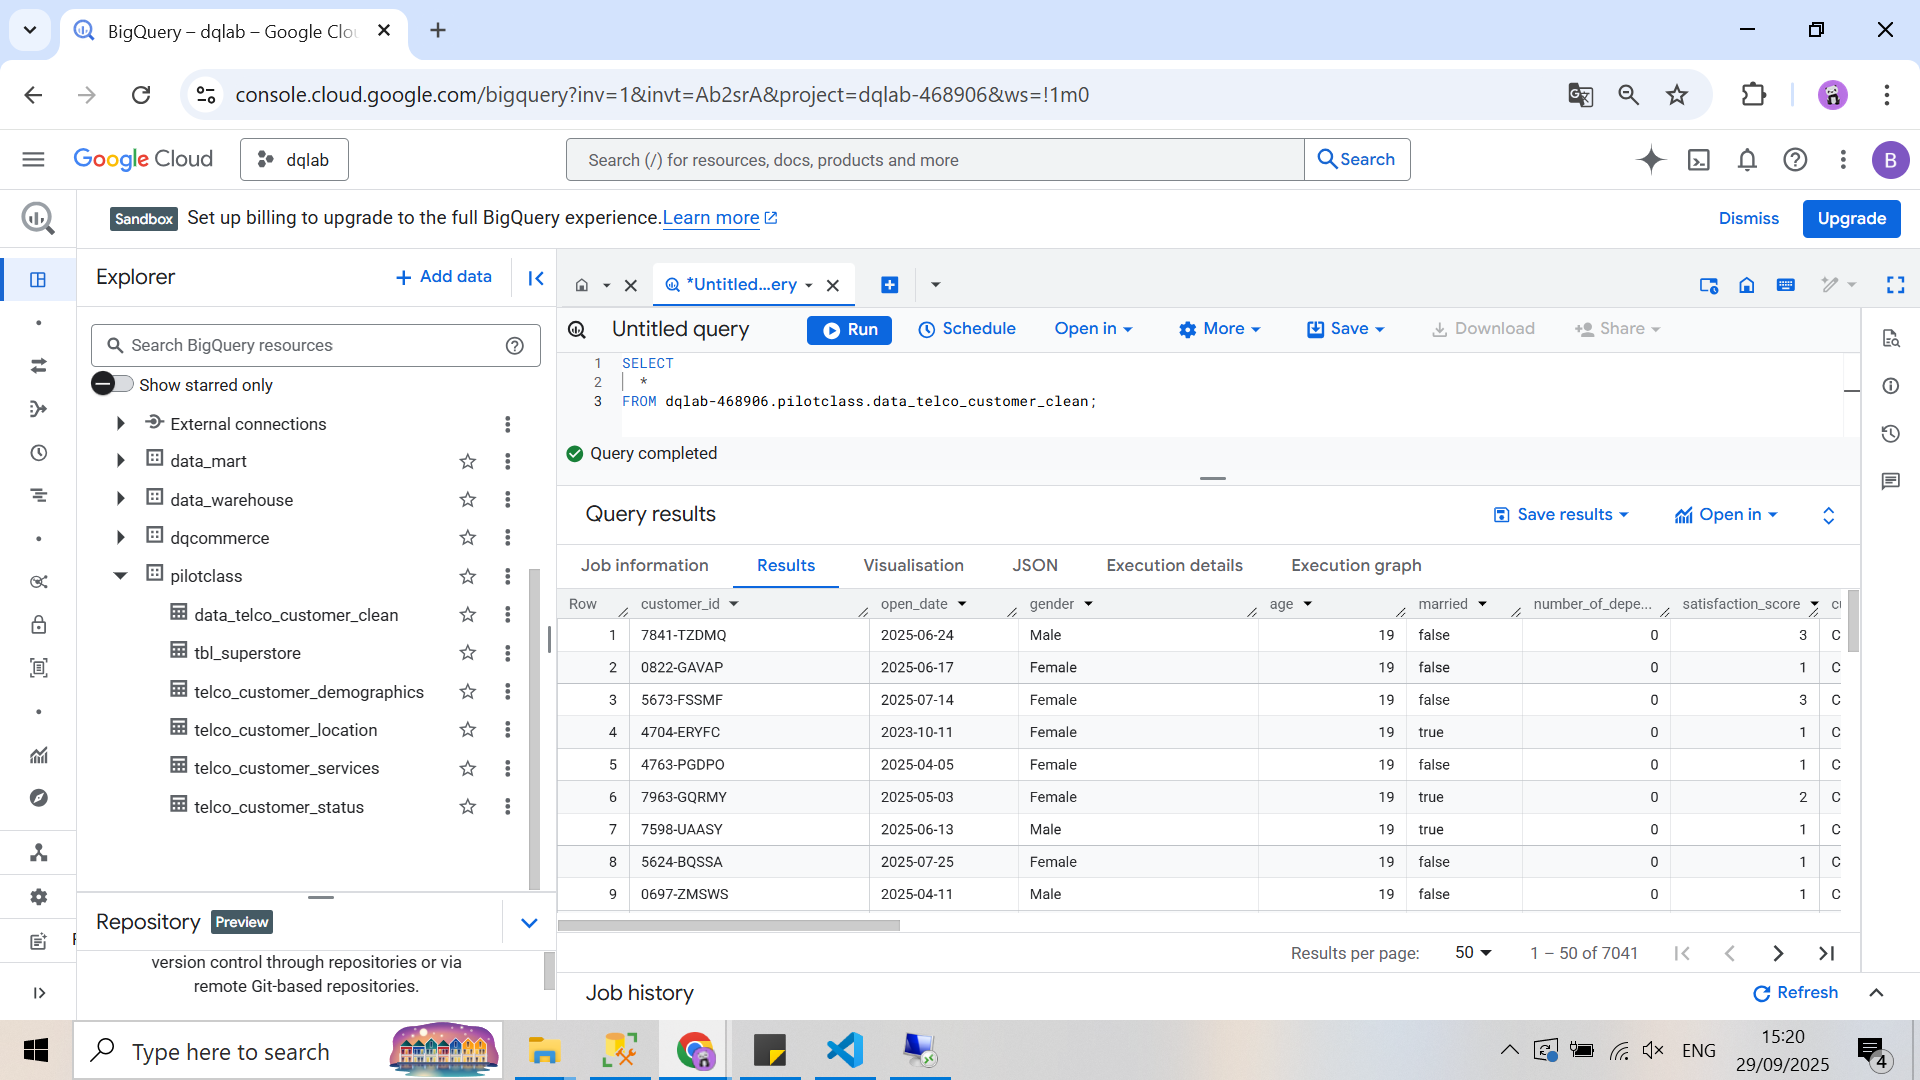

**Written By :** <br>
<a href="https://www.linkedin.com/in/akhmad-muzaki-243407210/"><img alt="Linked In Link" src="https://img.shields.io/badge/-Akhmad%20Muzaki-0072b1?style=for-the-badge&logo=None&logoColor=white" align="left"/></a>

<br><br>**for :**

<a href="https://dqlab.id/"><img src="https://dqlab.id/files/dqlab/cache/87e30118ebba5ec7d96f6ea8c9dcc10b_x_118_X_55.png" align="left" /></a>